In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)  # Adjust the width to display everything
pd.set_option('display.max_colwidth', None)  # Show full column content

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

In [2]:
# Read CSV file
twitter_df = pd.read_csv(r"C:\Users\User\iCloudDrive\Cursos\Data Circle\DataCircle_Twitter_Project\twitter_sentiment.csv")

In [3]:
# Convert date columns to datetime
twitter_df["created_at"] = pd.to_datetime(twitter_df["created_at"])
twitter_df["user_join_date"] = pd.to_datetime(twitter_df["user_join_date"])

In [4]:
# Create a column for 'created_at' with date only (without time info)
twitter_df["created_at_date"] = twitter_df["created_at"].dt.date

# Convert to datetime
twitter_df["created_at_date"] = pd.to_datetime(twitter_df["created_at_date"])

In [5]:
# Filter the top 10 most liked tweets where the dates is before the election date (2020-11-03)
top_10_tweet_likes = twitter_df.loc[twitter_df['created_at_date']<='2020-11-03'].sort_values(by='likes', ascending=False).head(10)

In [6]:
# Convert the top 10 dates with most values to a list
top_10_tweet_dates = top_10_tweet_likes['created_at_date'].dt.date.to_list()

In [7]:
top_10_tweet_dates

[datetime.date(2020, 10, 16),
 datetime.date(2020, 10, 15),
 datetime.date(2020, 11, 2),
 datetime.date(2020, 11, 1),
 datetime.date(2020, 11, 1),
 datetime.date(2020, 10, 27),
 datetime.date(2020, 10, 25),
 datetime.date(2020, 10, 24),
 datetime.date(2020, 11, 1),
 datetime.date(2020, 10, 16)]

In [8]:
most_tweeted_days = twitter_df.loc[twitter_df['created_at_date']<='2020-11-03'].groupby('created_at_date')['tweet'].count().sort_values(ascending=False)
most_tweeted_days

created_at_date
2020-11-03    58635
2020-10-23    58417
2020-11-02    45419
2020-11-01    32155
2020-10-16    30882
2020-10-28    29909
2020-10-22    26808
2020-10-30    26236
2020-10-27    26028
2020-10-31    25957
2020-10-26    25558
2020-10-29    25455
2020-10-21    24713
2020-10-15    23789
2020-10-25    23016
2020-10-24    22812
2020-10-19    22368
2020-10-20    21619
2020-10-18    20823
2020-10-17    20822
Name: tweet, dtype: int64

In [9]:
most_liked_days = twitter_df.loc[twitter_df['created_at_date']<='2020-11-03'].groupby('created_at_date')['likes'].sum().sort_values(ascending=False)
most_liked_days

created_at_date
2020-10-16    462502
2020-11-03    394009
2020-11-02    384650
2020-10-23    368992
2020-11-01    355871
2020-10-15    238974
2020-10-25    233889
2020-10-27    218037
2020-10-24    180841
2020-10-28    164463
2020-10-26    153264
2020-10-30    137909
2020-10-21    129666
2020-10-29    107629
2020-10-22    104304
2020-10-20    103404
2020-10-31     96913
2020-10-18     93212
2020-10-17     90581
2020-10-19     88215
Name: likes, dtype: int64

In [10]:
# Create a dataframe for both candidates
biden_df = twitter_df[twitter_df['candidate']=='biden']
trump_df = twitter_df[twitter_df['candidate']=='trump']

In [11]:
# Group by date and sentiment for both datasets
biden_sentiment_over_time = biden_df.loc[biden_df['created_at_date']<='2020-11-03'].groupby(['created_at_date', 'sentiment']).size().unstack(fill_value=0)
# Group by date and sentiment for both datasets
trump_sentiment_over_time = trump_df.loc[trump_df['created_at_date']<='2020-11-03'].groupby(['created_at_date', 'sentiment']).size().unstack(fill_value=0)

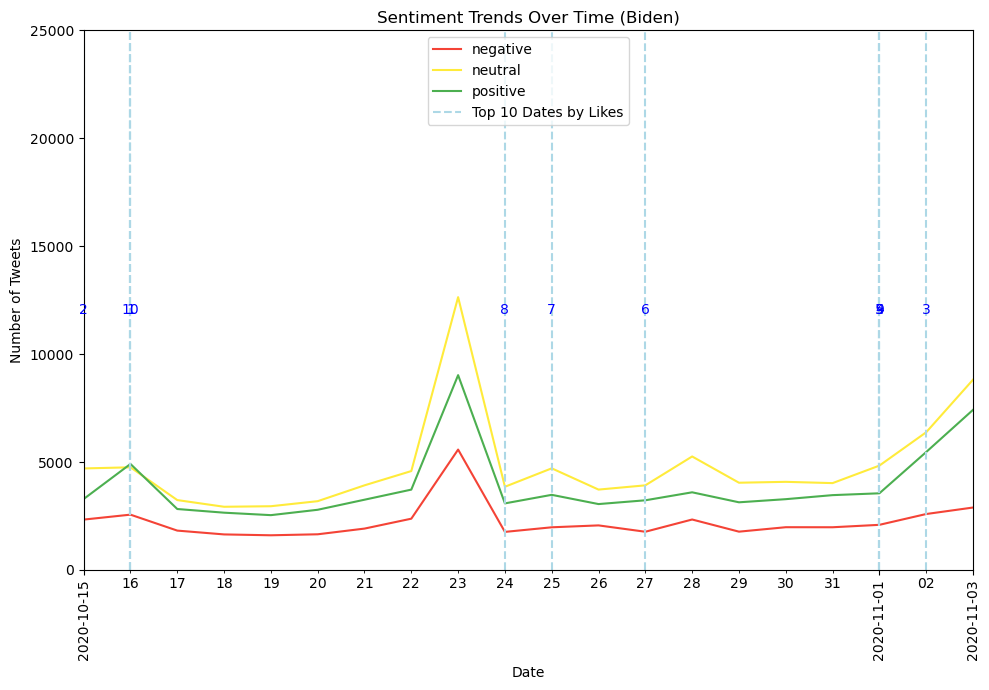

In [12]:
# Plot sentiment trends for Biden
biden_sentiment_over_time.plot(kind='line', figsize=(10, 7), color=['#f44336', '#ffeb3b', '#4caf50'])
plt.title('Sentiment Trends Over Time (Biden)')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')

# Add vertical lines with sequence numbers as labels
for idx, date in enumerate(top_10_tweet_dates, start=1):
    plt.axvline(date, color='lightblue', linestyle='--', linewidth=1.5)
    plt.text(date, plt.gca().get_ylim()[1] * 0.9, str(idx), color='blue', fontsize=10, ha='center')

# Create a single custom label for the vertical lines
plt.axvline(top_10_tweet_dates[0], color='lightblue', linestyle='--', linewidth=1.5, label='Top 10 Dates by Likes')


# Set the date format for x-axis ticks
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Rotate x-axis labels
plt.xticks(rotation=90)

# Set y-axis limits
plt.ylim(ymin=0, ymax=25000)

# Display the legend to show the specific date
plt.tight_layout()
plt.legend()
plt.show()

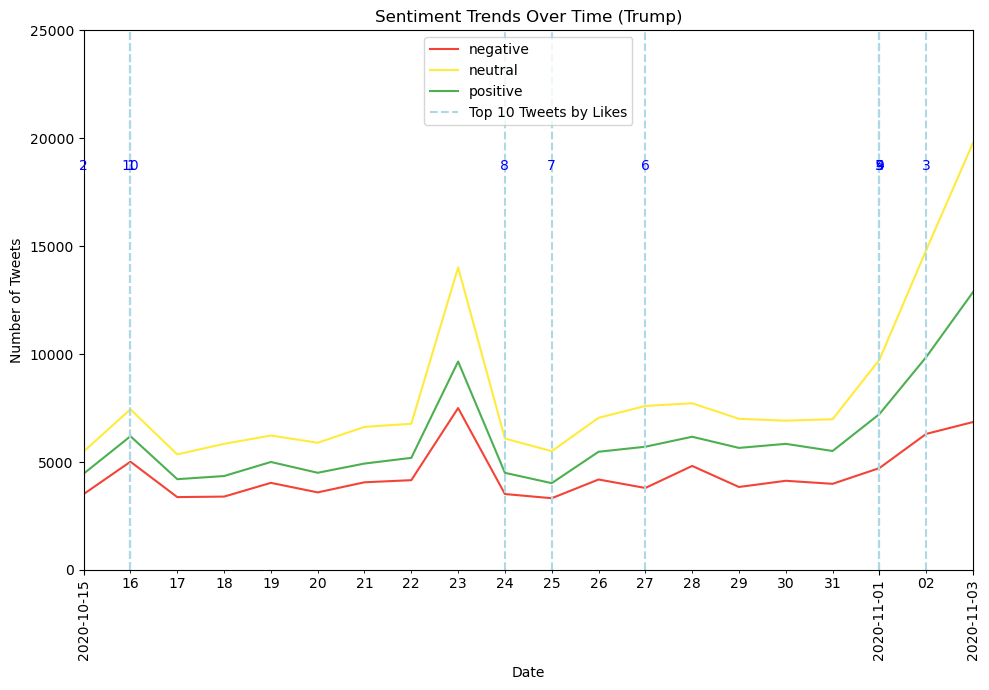

In [13]:
# Plot sentiment trends for Biden
trump_sentiment_over_time.plot(kind='line', figsize=(10, 7), color=['#f44336', '#ffeb3b', '#4caf50'])
plt.title('Sentiment Trends Over Time (Trump)')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')

# Add vertical lines with sequence numbers as labels
for idx, date in enumerate(top_10_tweet_dates, start=1):
    plt.axvline(date, color='lightblue', linestyle='--', linewidth=1.5)
    plt.text(date, plt.gca().get_ylim()[1] * 0.9, str(idx), color='blue', fontsize=10, ha='center')

# Create a single custom label for the vertical lines
plt.axvline(top_10_tweet_dates[0], color='lightblue', linestyle='--', linewidth=1.5, label='Top 10 Tweets by Likes')

# Set the date format for x-axis ticks
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Rotate x-axis labels
plt.xticks(rotation=90)

# Set y-axis limits
plt.ylim(ymin=0, ymax=25000)

# Display the legend to show the specific date
plt.tight_layout()
plt.legend()
plt.show()

In [14]:
# Biden's Polarity Sentiment means over time
biden_sentiment_means = biden_df.loc[(biden_df['created_at_date']<='2020-11-03') & ((biden_df['sentiment']=='positive') | (biden_df['sentiment']=='negative'))].groupby('created_at_date')['polarity'].mean()

# Trump's Polarity Sentiment means over time
trump_sentiment_means = trump_df.loc[(trump_df['created_at_date']<='2020-11-03') & ((trump_df['sentiment']=='positive') | (trump_df['sentiment']=='negative'))].groupby('created_at_date')['polarity'].mean()

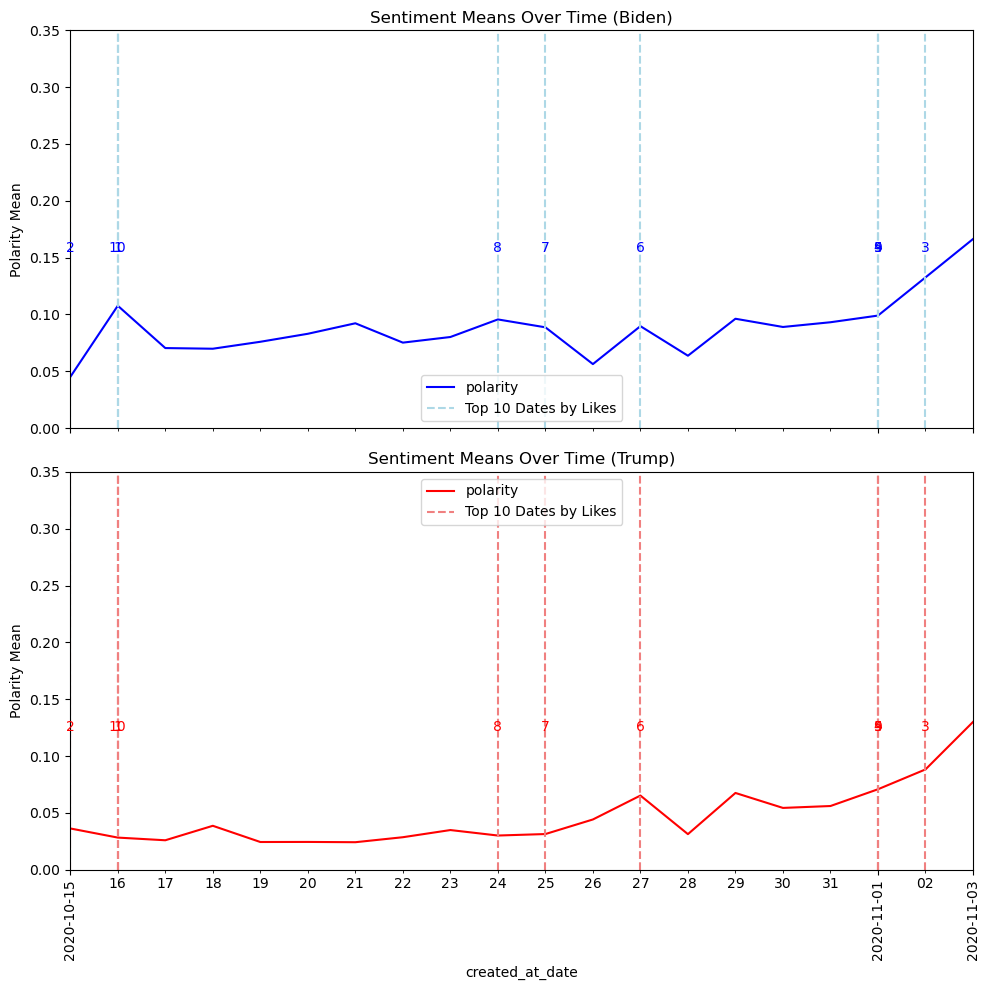

In [15]:
# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

# Plot sentiment trends for Biden
biden_sentiment_means.plot(kind='line', ax=axs[0], color='blue')
axs[0].set_title('Sentiment Means Over Time (Biden)')
axs[0].set_ylabel('Polarity Mean')

# Add vertical lines for Biden
for idx, date in enumerate(top_10_tweet_dates, start=1):
    axs[0].axvline(date, color='lightblue', linestyle='--', linewidth=1.5)
    axs[0].text(date, axs[0].get_ylim()[1] * 0.9, str(idx), color='blue', fontsize=10, ha='center')

# Create a single custom label for the vertical lines for Biden
axs[0].axvline(top_10_tweet_dates[0], color='lightblue', linestyle='--', linewidth=1.5, label='Top 10 Dates by Likes')
axs[0].legend()

# Plot sentiment trends for Trump
trump_sentiment_means.plot(kind='line', ax=axs[1], color='red')
axs[1].set_title('Sentiment Means Over Time (Trump)')
axs[1].set_ylabel('Polarity Mean')

# Add vertical lines for Trump
for idx, date in enumerate(top_10_tweet_dates, start=1):
    axs[1].axvline(date, color='lightcoral', linestyle='--', linewidth=1.5)
    axs[1].text(date, axs[1].get_ylim()[1] * 0.9, str(idx), color='red', fontsize=10, ha='center')

# Create a single custom label for the vertical lines for Trump
axs[1].axvline(top_10_tweet_dates[0], color='lightcoral', linestyle='--', linewidth=1.5, label='Top 10 Dates by Likes')
axs[1].legend()

# Set the date format for x-axis ticks
axs[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Rotate x-axis labels
plt.xticks(rotation=90)

# Set y-axis limits for both plots to better visualize the performance
for ax in axs:
    ax.set_ylim(ymin=0, ymax=0.3)  # Adjust this range according to your data
    ax.set_yticks(np.arange(0, 0.4, step=0.05))  # Adjust step if needed

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [16]:
# Convert trumps daily means to a dataframe
trump_daily_means_df = pd.DataFrame(trump_sentiment_means).reset_index()

In [17]:
# Convert Bidens daily means to a dataframe
biden_daily_means_df = pd.DataFrame(biden_sentiment_means).reset_index()

In [18]:
# Convert the difference between both candidates daily means to a dataframe
diff_daily_means_df = pd.DataFrame(
    {
    'Date': trump_daily_means_df['created_at_date'], 
     'Difference': biden_daily_means_df['polarity'] - trump_daily_means_df['polarity']
     }
     )

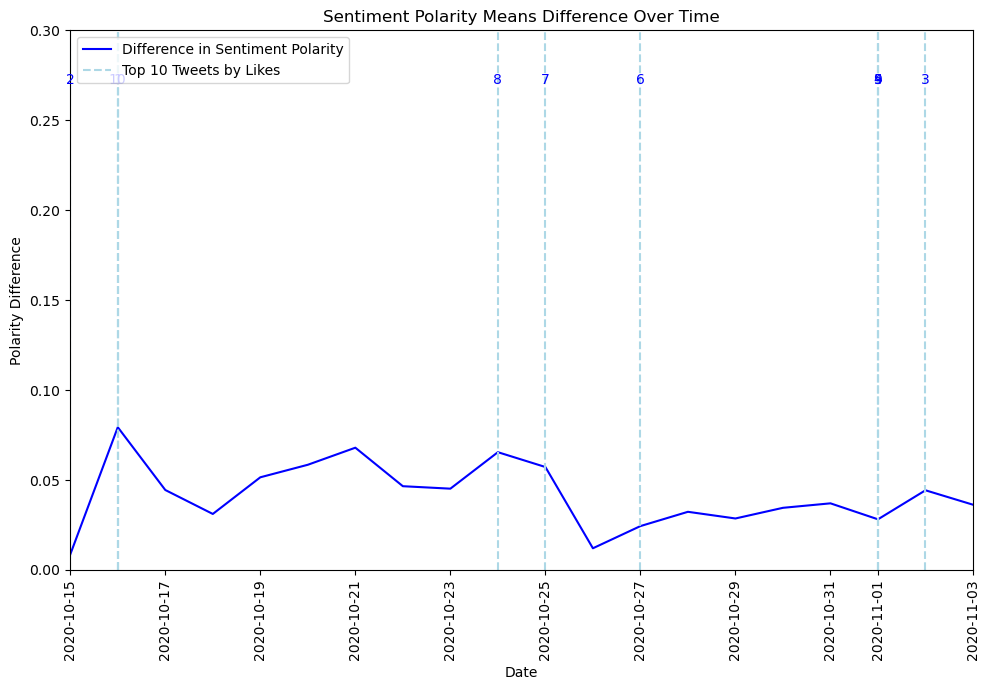

In [19]:
# Ensure that the 'date' column in diff_daily_means_df is in datetime format
diff_daily_means_df['Date'] = pd.to_datetime(diff_daily_means_df['Date'])

# Plot with 'date' as the x-axis and 'difference' as the y-axis
plt.figure(figsize=(10, 7), dpi=100)
plt.plot(diff_daily_means_df['Date'], diff_daily_means_df['Difference'], color='blue', label='Difference in Sentiment Polarity')

plt.title('Sentiment Polarity Means Difference Over Time')
plt.xlabel('Date')
plt.ylabel('Polarity Difference')

# Set y-axis limits for better zoom
plt.ylim(0, 0.3)
plt.yticks(np.arange(0, 0.35, step=0.05))

# Add vertical lines with sequence numbers as labels
for idx, date in enumerate(top_10_tweet_dates, start=1):
    plt.axvline(date, color='lightblue', linestyle='--', linewidth=1.5)
    plt.text(date, 0.27, str(idx), color='blue', fontsize=10, ha='center')  # Adjust text placement

# Add a custom label for the top tweet dates
if top_10_tweet_dates:
    plt.axvline(top_10_tweet_dates[0], color='lightblue', linestyle='--', linewidth=1.5, label='Top 10 Tweets by Likes')

# Set x-axis date format and tick rotation
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=90)

# Set x-axis limits to a specified date range
plt.xlim(pd.Timestamp('2020-10-15'), pd.Timestamp('2020-11-03'))

# Display the legend and show the plot
plt.legend()
plt.tight_layout()
plt.show()

In [20]:
biden_positive_top_10_tweet_likes = biden_df.loc[(biden_df['created_at_date']<='2020-11-03') & (biden_df['sentiment']=='positive')].sort_values(by='likes', ascending=False).head(10)

In [21]:
biden_positive_top_10_tweet_dates = biden_positive_top_10_tweet_likes['created_at_date'].dt.date.to_list()

In [22]:
biden_positive_top_10_tweet_dates

[datetime.date(2020, 10, 16),
 datetime.date(2020, 11, 2),
 datetime.date(2020, 11, 1),
 datetime.date(2020, 11, 1),
 datetime.date(2020, 10, 27),
 datetime.date(2020, 10, 25),
 datetime.date(2020, 10, 24),
 datetime.date(2020, 11, 1),
 datetime.date(2020, 10, 16),
 datetime.date(2020, 11, 2)]

In [23]:
trump_positive_top_10_tweet_likes = trump_df.loc[(trump_df['created_at_date']<='2020-11-03') & (trump_df['sentiment']=='positive')].sort_values(by='likes', ascending=False).head(10)

In [24]:
trump_positive_top_10_tweet_dates = trump_positive_top_10_tweet_likes['created_at_date'].dt.date.to_list()

In [25]:
trump_positive_top_10_tweet_dates

[datetime.date(2020, 10, 24),
 datetime.date(2020, 10, 25),
 datetime.date(2020, 10, 16),
 datetime.date(2020, 11, 2),
 datetime.date(2020, 10, 25),
 datetime.date(2020, 10, 15),
 datetime.date(2020, 10, 23),
 datetime.date(2020, 11, 3),
 datetime.date(2020, 10, 23),
 datetime.date(2020, 10, 20)]